### Cab-Driver Agent

Submitted By:
1. Ramakant Sharma
2. Rahana Abdul Kadir
3. Deepak Shukla
4. Rizwan Khan

In [1]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle

# for building DQN model
from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
from Env import CabDriver

Using TensorFlow backend.


#### Defining Time Matrix

In [2]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")
Time_matrix

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 2.,  3.,  3., ...,  7.,  0.,  6.],
         [ 2.,  3.,  3., ...,  7.,  0.,  6.],
         [ 2.,  3.,  3., ...,  7.,  0.,  6.],
         ...,
         [ 2.,  3.,  6., ...,  7.,  4.,  2.],
         [ 2.,  3.,  6., ...,  7.,  4.,  2.],
         [ 2.,  3.,  6., ...,  7.,  4.,  2.]],

        [[ 2.,  6.,  5., ...,  3.,  7.,  7.],
         [ 2.,  6.,  5., ...,  3.,  7.,  7.],
         [ 2.,  6.,  5., ...,  3.,  7.,  7.],
         ...,
         [ 6.,  2.,  8., ...,  4.,  5.,  5.],
         [ 6.,  2.,  8., ...,  4.,  5.,  5.],
         [ 6.,  2.,  8., ...,  4.,  5.,  5.]],

        [[10.,  6.,  8., ...,  7.,  4.,  6.],
         [10.,  6.,  8., ...,  7.,  4.,  6.],
         [10.,  6.,  8., ...,  7

#### Tracking the state-action pairs for checking convergence


In [3]:
# Initialising the States_tracked (for convergence) for storing the Q values

States_track = collections.defaultdict(dict)

In [4]:
# Initialising states to be tracked
def initialise_tracking_states():
    # selecting any 5 Q-values
    sample_q_values = [((1,12,5),(2,3)),((2,8,1),(2,4)), ((3,13,4),(3,1)), ((4,14,4),(4,5)), ((5,9,6),(5,1))]
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [5]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [6]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_max = 1.0
        self.epsilon_decay = 0.999 
        self.epsilon_min = 0.01 

        self.batch_size = 32        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()

    # approximate Q function using Neural Network
    def build_model(self):
        model = Sequential()
        # Write your code here: Add layers to your neural nets       
        model.add(Dense(32, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(32, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='relu',
                        kernel_initializer='he_uniform'))
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model



    def get_action(self, state, requests_idx, actions):
    # Write your code here:
    # get action from model using epsilon-greedy policy
    # Decay in ε after we generate each sample from the environment   
        if np.random.rand() <= self.epsilon:
            return random.choice(requests_idx)
        else:
            state = np.array(env.state_encod_arch1(state)).reshape(1, self.state_size)
            q_value = self.model.predict(state)

            pos_q_vals = [q_value[0][i] for i in requests_idx]

            return requests_idx[np.argmax(pos_q_vals)]


    def append_sample(self, state, action, reward, next_state, done):
    # Write your code here:
    # save sample <s,a,r,s'> to the replay memory
         # Adding sample to the memory. 
        self.memory.append((state, action, reward, next_state, done))

    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):

        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = np.zeros((self.batch_size, self.state_size)) # write here
            update_input =  np.zeros((self.batch_size, self.state_size))# write here

            action, reward, done = [], [], []

            for i in range(self.batch_size):
                state_val, action_val, reward_val, next_state_val,done_val = mini_batch[i]
                update_input[i] = env.state_encod_arch1(state_val)     
                action.append(action_val)
                reward.append(reward_val)
                update_output[i] = env.state_encod_arch1(next_state_val)
                done.append(done_val)

            # Write your code from here
            # 1. Predict the target from earlier model
            target = self.model.predict(update_input)

            # 2. Get the target for the Q-network
            target_val = self.model.predict(update_output)

            #3. Update your 'update_output' and 'update_input' batch
            for i in range(self.batch_size):
                # Q Learning: get maximum Q value at s' from target model
                if done[i]:
                    target[i][action[i]] = reward[i]
                else: 
                    target[i][action[i]] = reward[i] + self.discount_factor * np.amax(target_val[i])

            
            # 4. Fit your model and track the loss values
            history=self.model.fit(update_input, target, batch_size=self.batch_size,epochs=1, verbose=0)
            return history.history['loss'][0]
        return 0
    def update_tracking_states(self):
        for state in States_track.keys():
            qvals = self.model.predict(env.state_encod_arch1(state).reshape(1, self.state_size))
            for action in States_track[state].keys():
                i = action_space.index(action)
                States_track[state][action].append(qvals[0][i]) 
                
       
    def save(self, name):
        self.model.save(name)

 

In [7]:
Episodes = 10000
save_threshold=1000
print_threshold=100
states_threshold=1000

m = 5
t = 24
d = 7

# Call the environment
env = CabDriver()
action_space, state_space, state = env.reset()

# Set up state and action sizes.
state_size = m+t+d
action_size = len(action_space)

#Call the DQN agent
agent = DQNAgent(state_size, action_size)

# to store rewards in each episode
rewards_per_episode,loss_per_episode, episodes = [], [],[]

# Initialize tracking states
initialise_tracking_states()


### DQN block

In [8]:
import time
start_time = time.time()

agent.model.summary()

for episode in range(Episodes):
    
    terminal_state = False
    score = 0
    total_time = 0
    loss = 0
   
    action_space, state_space, state = env.reset()
    
    initial_state = env.state_init
    # Write code here
        
    while not terminal_state:
        
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        requests_idx, action = env.requests(state)
        action = agent.get_action(state, requests_idx, action)
        # 2. Evaluate your reward and next state
        reward, next_state, customer_time= env.step(state, env.action_space[action], Time_matrix)
        # 3. Append the experience to the memory
        total_time += customer_time
        if (total_time > 720):
            terminal_state = True
        else:
            agent.append_sample(state, action, reward, next_state, terminal_state)
        # 4. Train the model by calling function agent.train_model
        track_loss = agent.train_model()
        # 5. Keep a track of rewards, Q-values, loss
        score += reward
        loss +=track_loss
        state = next_state
        
        
    # store total reward obtained in this episode
    rewards_per_episode.append(score)
    episodes.append(episode)
    loss_per_episode.append(loss)
    
    
    if agent.epsilon > agent.epsilon_min:
        agent.epsilon = agent.epsilon_min + (agent.epsilon_max - agent.epsilon_min) * np.exp(-agent.epsilon_decay*episode)
      
    
    # Print every 10 episodes:
    if ((episode + 1) % print_threshold == 0):
        print("episode: {0}, reward: {1}, memory_length: {2}, epsilon: {3}, loss: {4} ,total_time: {5}".format(episode,
                                                                score,len(agent.memory),agent.epsilon,loss, total_time))
    # Save the Q_value of the state, action pair we are tracking
    if ((episode + 1) % states_threshold == 0):
        agent.update_tracking_states()

    if(episode % save_threshold == 0):
        print("Saving DQN Model {}".format(episode))
        agent.save(name="DQN_Model_weights.pkl")
    
elapsed_time = time.time() - start_time
print("Elapsed Time :{}".format(elapsed_time))
    
  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1184      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 21)                693       
Total params: 2,933
Trainable params: 2,933
Non-trainable params: 0
_________________________________________________________________
Saving DQN Model 0
episode: 99, reward: 971.0, memory_length: 2000, epsilon: 0.01, loss: 3598.2560456991196 ,total_time: 722.0
episode: 199, reward: 182.0, memory_length: 2000, epsilon: 0.01, loss: 119685.99751672149 ,total_time: 721.0
episode: 299, reward: 622.0, memory_length: 2000, epsilon: 0.01, loss: 59146.730901002884 ,total_time: 727.0
episode: 399, reward: 953.0, memory_l

episode: 6799, reward: 754.0, memory_length: 2000, epsilon: 0.01, loss: 61678.24827957153 ,total_time: 724.0
episode: 6899, reward: 906.0, memory_length: 2000, epsilon: 0.01, loss: 10828.344337463379 ,total_time: 728.0
episode: 6999, reward: 1039.0, memory_length: 2000, epsilon: 0.01, loss: 21500.49501001835 ,total_time: 730.0
Saving DQN Model 7000
episode: 7099, reward: 920.0, memory_length: 2000, epsilon: 0.01, loss: 114.25484055280685 ,total_time: 727.0
episode: 7199, reward: 980.0, memory_length: 2000, epsilon: 0.01, loss: 53388.637016415596 ,total_time: 722.0
episode: 7299, reward: 761.0, memory_length: 2000, epsilon: 0.01, loss: 76143.45465517044 ,total_time: 721.0
episode: 7399, reward: 937.0, memory_length: 2000, epsilon: 0.01, loss: 32055.352502942085 ,total_time: 733.0
episode: 7499, reward: 1039.0, memory_length: 2000, epsilon: 0.01, loss: 68598.60988545418 ,total_time: 722.0
episode: 7599, reward: 991.0, memory_length: 2000, epsilon: 0.01, loss: 81409.8514289856 ,total_time

In [9]:
# save the rewards, loss and States track pairs episodes
save_obj(rewards_per_episode, 'rewards_per_episode')
save_obj(loss_per_episode,'loss_per_episode')
save_obj(States_track,'States_track')

### Tracking Convergence

<function matplotlib.pyplot.show(*args, **kw)>

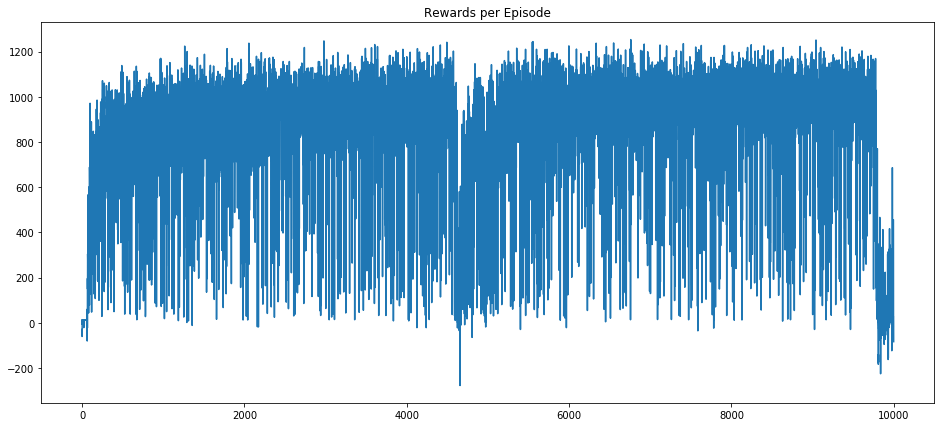

In [22]:
# Load the rewards and plot the results
with open('rewards_per_episode.pkl', 'rb') as f:
    rewards_per_episode = pickle.load(f)

xaxis = np.asarray(range(0, len(rewards_per_episode)))
plt.figure(0, figsize=(16,7))
plt.title("Rewards per Episode")
plt.plot(xaxis,np.asarray(rewards_per_episode))
plt.show  

<function matplotlib.pyplot.show(*args, **kw)>

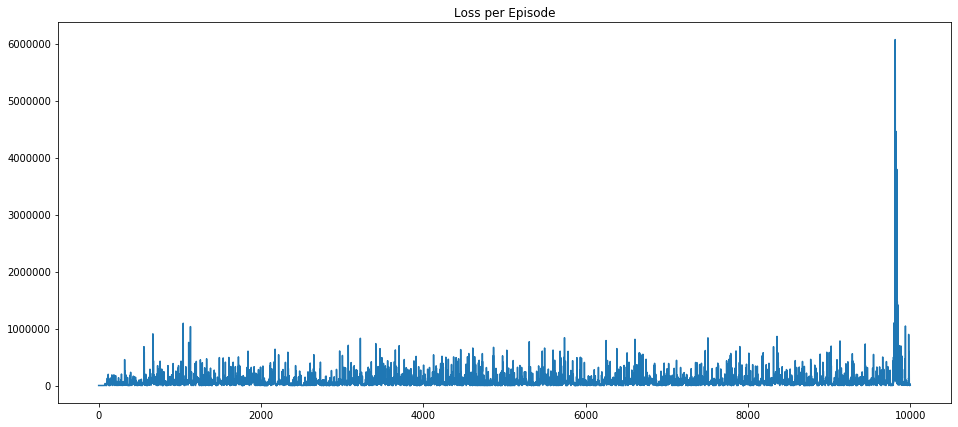

In [23]:
# Load the Loss and plot the results
with open('loss_per_episode.pkl', 'rb') as f:
    loss_per_episode = pickle.load(f)

xaxis = np.asarray(range(0, len(loss_per_episode)))
plt.figure(0, figsize=(16,7))
plt.title("Loss per Episode")
plt.plot(xaxis,np.asarray(loss_per_episode))
plt.show  

In [13]:
# Load the q values of state action pairs
with open('States_track.pkl', 'rb') as f:
    States_track = pickle.load(f)
    

In [14]:
States_track

defaultdict(dict,
            {(1,
              12,
              5): {(2, 3): [2607.7405,
               3006.669,
               2689.6619,
               2726.683,
               2458.7676,
               2702.5996,
               2612.8125,
               2568.9954,
               2639.683,
               4679.7134]},
             (2,
              8,
              1): {(2, 4): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
             (3,
              13,
              4): {(3, 1): [2675.0776,
               3016.4343,
               2731.7402,
               2767.6033,
               2511.1133,
               2750.5027,
               2665.3342,
               2635.573,
               2704.0269,
               4590.7314]},
             (4,
              14,
              4): {(4, 5): [1386.447,
               2133.6978,
               1784.1613,
               2399.1577,
               2205.138,
               2062.1655,
               1817.3032,
               1646.3102

<function matplotlib.pyplot.show(*args, **kw)>

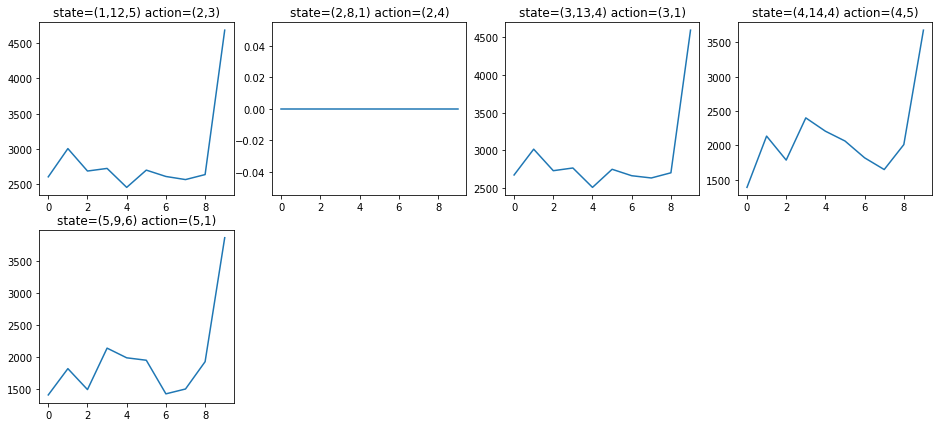

In [15]:
# Plot the results - state_action

plt.figure(0, figsize=(16,7))

xaxis = np.asarray(range(0, len(States_track[(1,12,5)][(2,3)])))
plt.subplot(241)
plt.title('state=(1,12,5) action=(2,3)')
plt.plot(xaxis,np.asarray(States_track[(1,12,5)][(2,3)]))
plt.show

xaxis = np.asarray(range(0, len(States_track[(2,8,1)][(2,4)])))
plt.subplot(242)
plt.title('state=(2,8,1) action=(2,4)')
plt.plot(xaxis,np.asarray(States_track[(2,8,1)][(2,4)]))
plt.show

xaxis = np.asarray(range(0, len(States_track[(3,13,4)][(3,1)])))
plt.subplot(243)
plt.title('state=(3,13,4) action=(3,1)')
plt.plot(xaxis,np.asarray(States_track[(3,13,4)][(3,1)]))
plt.show

xaxis = np.asarray(range(0, len(States_track[(4,14,4)][(4,5)])))
plt.subplot(244)
plt.title('state=(4,14,4) action=(4,5)')
plt.plot(xaxis,np.asarray(States_track[(4,14,4)][(4,5)]))
plt.show

xaxis = np.asarray(range(0, len(States_track[(5,9,6)][(5,1)])))
plt.subplot(245)
plt.title('state=(5,9,6) action=(5,1)')
plt.plot(xaxis,np.asarray(States_track[(5,9,6)][(5,1)]))
plt.show

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

In [16]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))

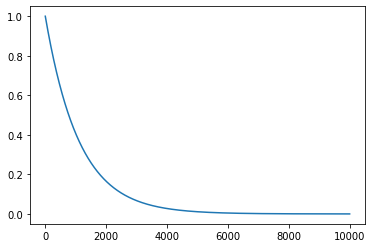

In [17]:
plt.plot(time, epsilon)
plt.show()